<h1>Correlation Analysis</h1>

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

#Get data
comm_data = pd.read_csv("Data/censusCrimeClean.csv")


<p class="p">We will be comparing median household income and its effect on violent crimes per population. First we will calculate the Pearson and Spearman rank correlations. These two give us an idea of the correlation between the two variables. There is also a p-value, which is a measure of how likely or probable it is that any observed correlation is due to chance. The smaller the p-value, the larger the likelihood the observed correlation is by chance and there is evidence against the null hypothesis. The opposite is true for large p-values.<br/><br/> The standard in hypothesis testing is to assume a 5% significance level, if the p-value is smaller than 5, this means there is evidence against the null hypothesis- that there is no correlation.</p>

In [3]:
#Calculate pearson rank of Median Income vs Violent Crimes per population
pr_medIncome_VC= stats.pearsonr(comm_data.medIncome,comm_data.ViolentCrimesPerPop)
pr_medIncome_VC

(-0.42422061672612743, 6.334424808041331e-88)

In [4]:
#Calculate pearson rank of Median Income vs Violent Crimes per population
sr_medIncome_VC = stats.spearmanr(comm_data.medIncome,comm_data.ViolentCrimesPerPop)
sr_medIncome_VC 

SpearmanrResult(correlation=-0.482169950997556, pvalue=1.2978853095169542e-116)

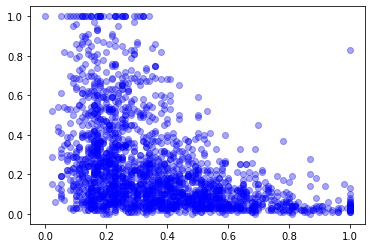

In [5]:
#Plot the two variables against each other.
plt.scatter(comm_data.medIncome,comm_data.ViolentCrimesPerPop,alpha=0.35, c='b')
plt
plt.show()

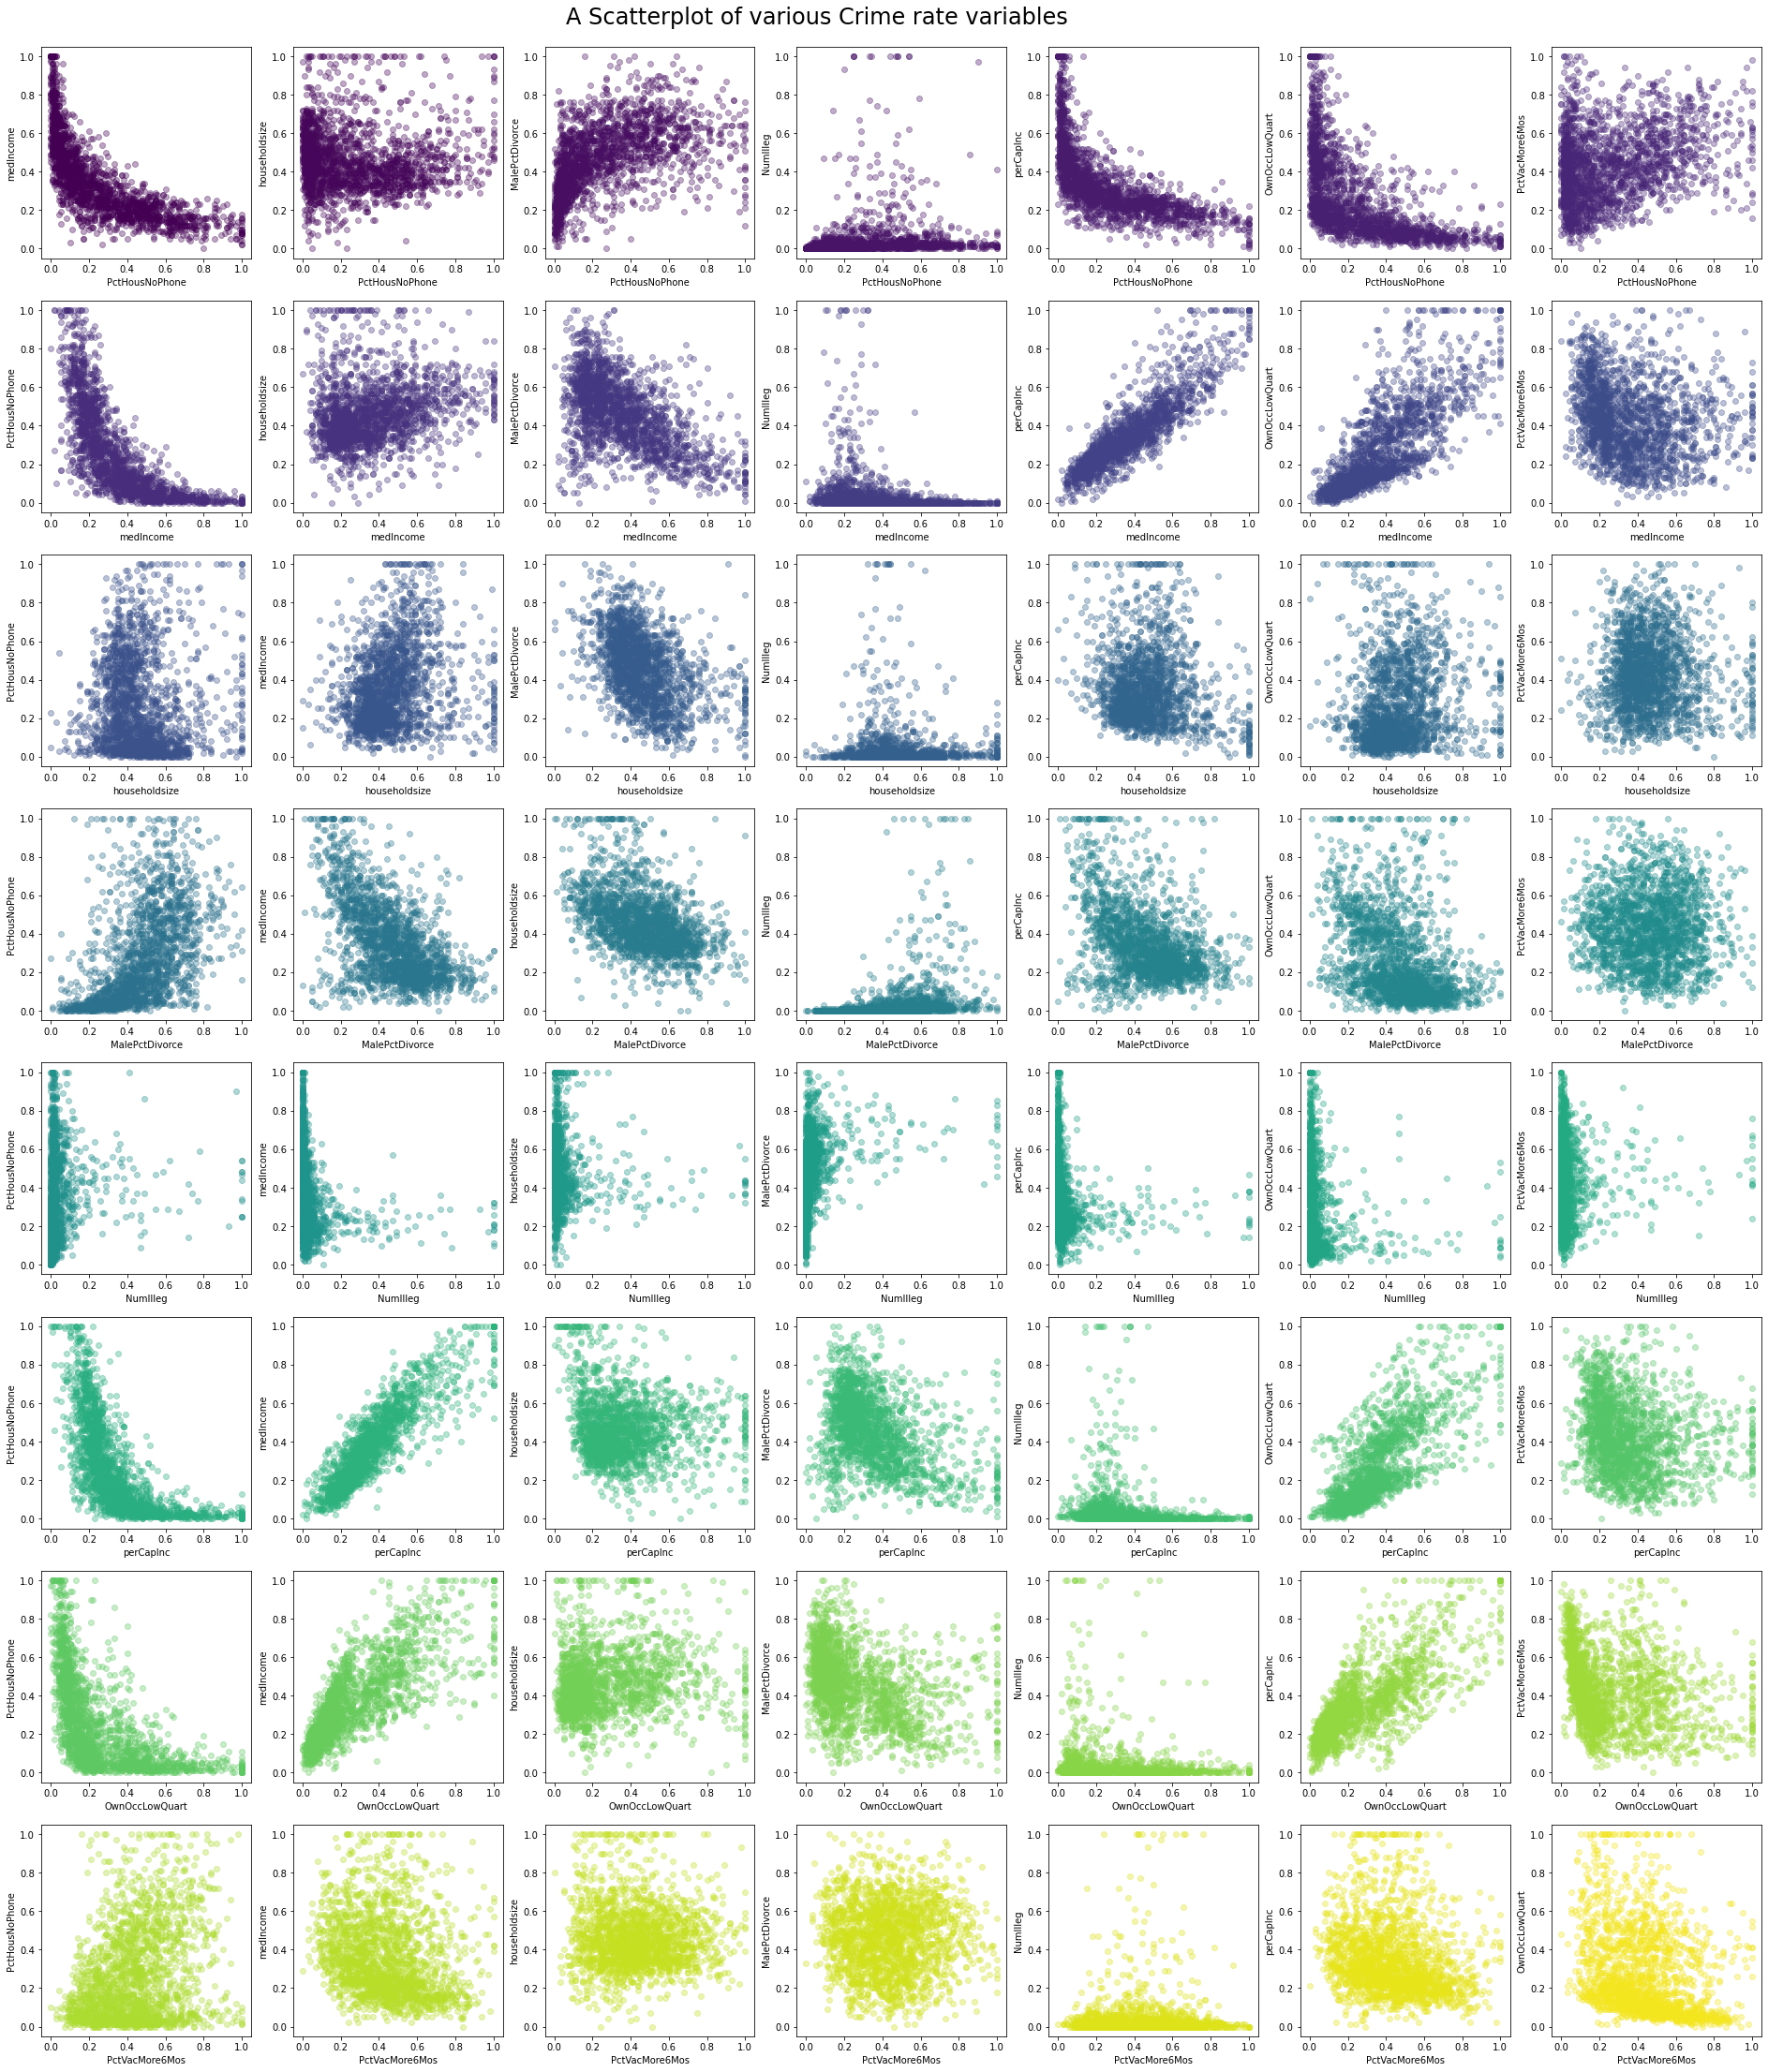

In [6]:
import random
from pandas.api.types import is_numeric_dtype
import matplotlib.cm as cm

#No of random cols u want
nocol = 8

#Get all columns
cols = comm_data.columns
numeric_cols = []

#Check if it is numeric 
for col in cols:
    if(is_numeric_dtype(comm_data[col])):
        numeric_cols.append(col)

#Get all the numeric columns- now we can carry out analysis.
comm_num = comm_data.loc[:,numeric_cols]         
comm_num

#Grab random cols
random_cols = list(comm_num.columns[random.sample(range(0, len(comm_num.columns)-1), nocol)])


#Creating different colors for the sample sizes.
cmap = cm.get_cmap('viridis')
graph_c = []
for s in range(0,(nocol-1)*nocol):
    graph_c.append(cmap(s/((nocol-1)*nocol)))
    
#loop and create graphs
graph_no = 1

#for storing calculated stats
cm_stats = []

#For clarity
fig = plt.figure(figsize=(20,20))
for x in random_cols:
    for y in random_cols:
        #since we dont wanna plot the same variable against each other
        if(x!=y):
            sp = plt.subplot( len(random_cols), len(random_cols)-1, graph_no)
            sp.scatter(comm_num[x],comm_num[y], alpha=0.35, facecolors= graph_c[graph_no-1])
            plt.xlabel(x)
            plt.ylabel(y)
            sr = stats.spearmanr(comm_num[x],comm_num[y])
            pr = stats.pearsonr(comm_num[x],comm_num[y])
            row = [x,y,sr[0], sr[1] ,pr[0] , pr[1]]
            cm_stats.append(row)
            graph_no += 1
plt.suptitle("A Scatterplot of various Crime rate variables",x=0.7,y=1.63,fontsize=24 )             
plt.subplots_adjust(right=1.4, top=1.6) 
plt.show()


In [7]:
pd.DataFrame(cm_stats,columns = ["x","y","spearman","spearman p","pearson","pearson p"]).head()


x               y  spearman     spearman p   pearson  \
0  PctHousNoPhone       medIncome -0.862987   0.000000e+00 -0.726987   
1  PctHousNoPhone   householdsize -0.131897   3.381573e-09 -0.007921   
2  PctHousNoPhone  MalePctDivorce  0.625078  1.353888e-216  0.516654   
3  PctHousNoPhone        NumIlleg  0.527487  3.069772e-143  0.180585   
4  PctHousNoPhone       perCapInc -0.820333   0.000000e+00 -0.659742   

       pearson p  
0   0.000000e+00  
1   7.237316e-01  
2  1.668680e-136  
3   4.446440e-16  
4  1.877661e-249

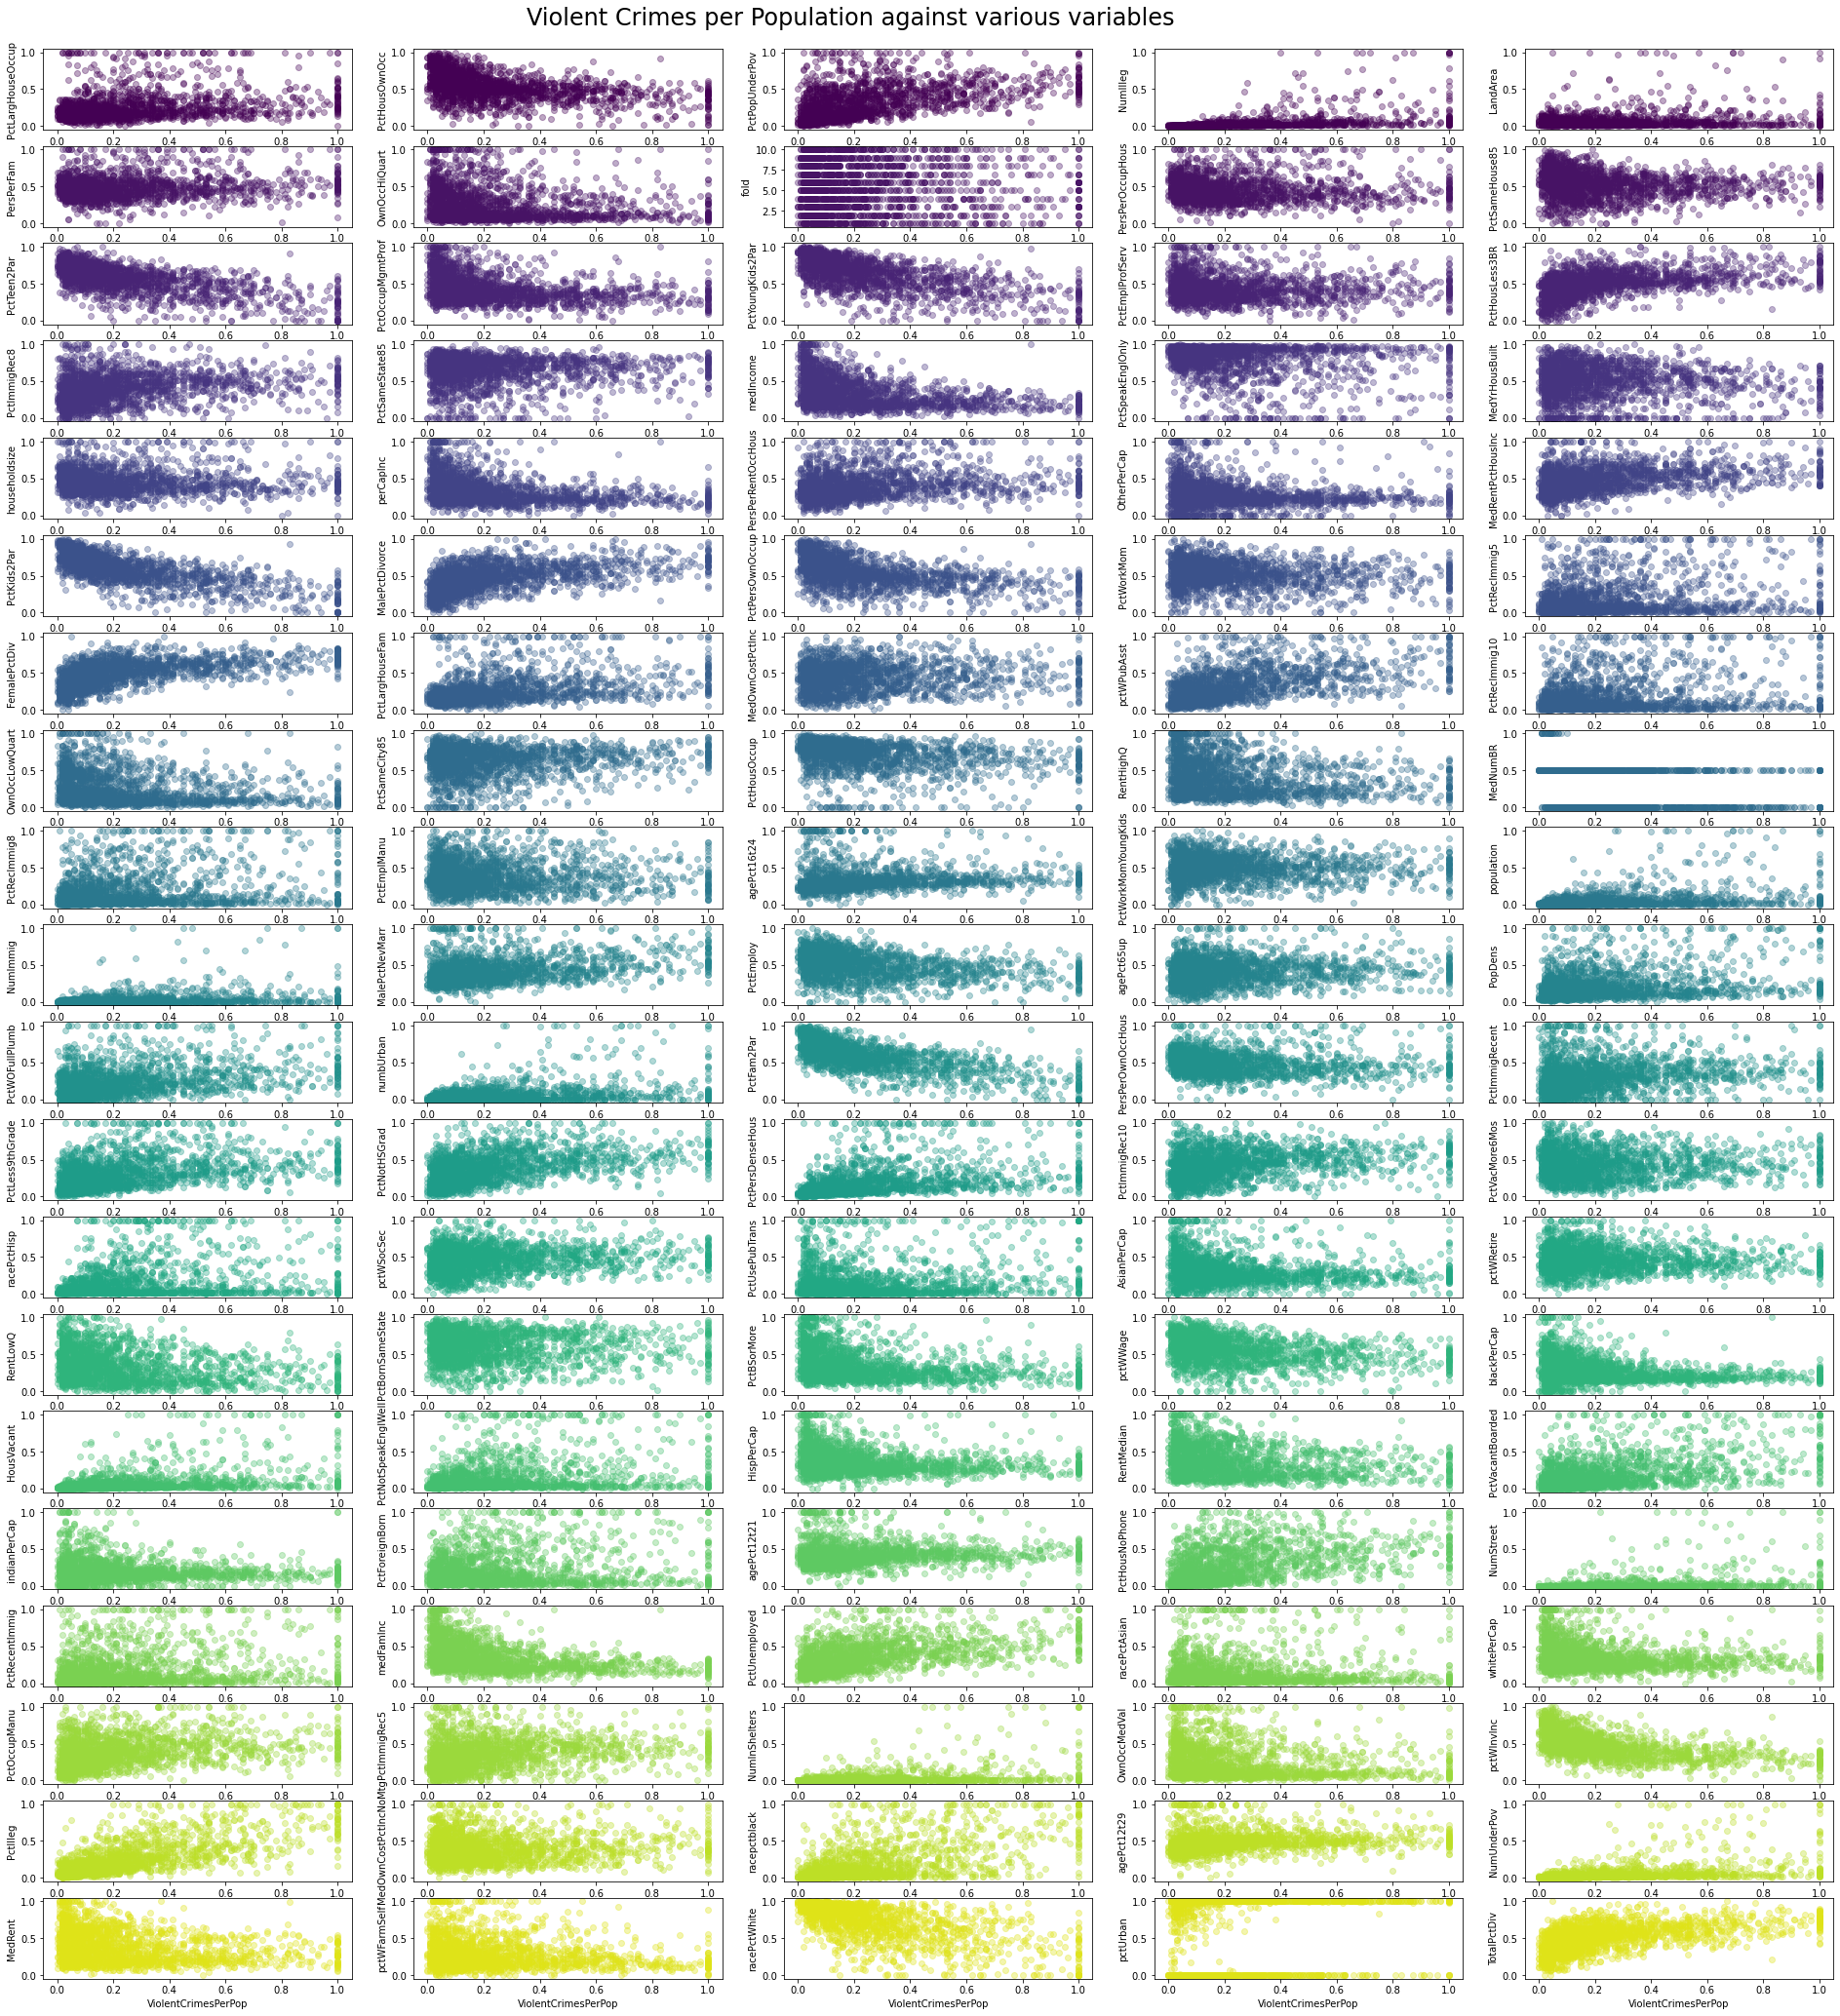

In [8]:
import math

#No of graphs u want
nocol = 100

#Grab random cols
random_cols = list(comm_num.columns[random.sample(range(0, len(comm_num.columns)-1), nocol)])

#Creating different colors for the sample sizes.
graph_c = []
for s in range(0, math.ceil(len(random_cols)/5)):
    graph_c.append(cmap(s/math.ceil(len(random_cols)/5)))
    
#loop and create graphs
graph_no = 1

#for storing calculated stats
crime_stats = []
vcpp = "ViolentCrimesPerPop"

#For clarity
fig = plt.figure(figsize=(20,20))
for y in random_cols:
    sp = plt.subplot( math.ceil(len(random_cols)/5), 5, graph_no)
    sp.scatter(comm_num[vcpp],comm_num[y], alpha=0.35, facecolors= graph_c [math.ceil(graph_no/5)-1] )
    plt.xlabel(vcpp)
    plt.ylabel(y)
    sr = stats.spearmanr(comm_num[vcpp],comm_num[y])
    pr = stats.pearsonr(comm_num[vcpp],comm_num[y])
    row = [vcpp, y, sr[0], sr[1], pr[0], pr[1]]
    crime_stats.append(row)
    graph_no += 1
plt.suptitle("Violent Crimes per Population against various variables",x=0.7,y=1.53,fontsize=24 )    
plt.subplots_adjust(right=1.4, top=1.5) 
plt.show()


In [9]:
#Make the data from an array into a dataframe
vc_statistics = pd.DataFrame(crime_stats,columns = ["x","y","spearman","spearman p","pearson","pearson p"])

#Select the top 11 values by spearman rank
vc_statistics.sort_values("spearman",ascending=False).head(11)


x                 y  spearman     spearman p   pearson  \
90  ViolentCrimesPerPop          PctIlleg  0.742786   0.000000e+00  0.737957   
3   ViolentCrimesPerPop          NumIlleg  0.709618  3.064124e-305  0.471028   
94  ViolentCrimesPerPop       NumUnderPov  0.663549  2.486831e-253  0.447582   
57  ViolentCrimesPerPop  PctPersDenseHous  0.647970  8.235020e-238  0.452901   
30  ViolentCrimesPerPop      FemalePctDiv  0.643777  8.668425e-234  0.556032   
99  ViolentCrimesPerPop       TotalPctDiv  0.633050  8.848081e-224  0.552777   
33  ViolentCrimesPerPop       pctWPubAsst  0.626224  1.293824e-217  0.574665   
2   ViolentCrimesPerPop    PctPopUnderPov  0.619226  1.882652e-211  0.521877   
92  ViolentCrimesPerPop      racepctblack  0.604277  8.527590e-199  0.631264   
26  ViolentCrimesPerPop    MalePctDivorce  0.594556  6.392069e-191  0.525407   
78  ViolentCrimesPerPop    PctHousNoPhone  0.585248  1.254713e-183  0.488243   

        pearson p  
90   0.000000e+00  
3   1.168875e-110  
94   7.943805e-99  
57  1.977787e-101  
30  3.307144e-162  
99  5.965105e-160  
33  1.281756e-175  
2   1.013656e-139  
92  3.757220e-222  
26  6.298428e-142  
78  5.934041e-120

<p>From the correlations, it seems that as the percentage of kids born to never married increases, the violent crimes per population also increases, this has a spearman rank correlation of 0.743 and a pearson of 0.738. The scatter plot for these tao variables is fairly linear hence both correlation methods can be applied with a good degree of success. The p-value for these two variables is 0, which is smaller than 0.05, this indicates that the null hypothesis can be rejected. Another couple of interesting statistics is the male percentage divorce rate, the correlation seems to suggest that areas with higher males who are divorced have higher rates of violent crimes.<p/>

In [10]:
#Select the bottom 11 values by spearman rank
vc_statistics.sort_values("spearman",ascending=True).head(11)

x                 y  spearman     spearman p   pearson  \
25  ViolentCrimesPerPop       PctKids2Par -0.763127   0.000000e+00 -0.738424   
52  ViolentCrimesPerPop        PctFam2Par -0.722948  3.260833e-322 -0.706667   
97  ViolentCrimesPerPop      racePctWhite -0.697328  2.011768e-290 -0.684770   
12  ViolentCrimesPerPop  PctYoungKids2Par -0.685663  4.852315e-277 -0.666059   
10  ViolentCrimesPerPop       PctTeen2Par -0.662821  1.387431e-252 -0.661582   
89  ViolentCrimesPerPop        pctWInvInc -0.658113  8.254017e-248 -0.576324   
27  ViolentCrimesPerPop   PctPersOwnOccup -0.596610  1.459542e-192 -0.525491   
1   ViolentCrimesPerPop     PctHousOwnOcc -0.527867  1.763664e-143 -0.470683   
81  ViolentCrimesPerPop         medFamInc -0.513162  2.198249e-134 -0.439108   
17  ViolentCrimesPerPop         medIncome -0.482170  1.297885e-116 -0.424221   
21  ViolentCrimesPerPop         perCapInc -0.422790   2.766288e-87 -0.352085   

        pearson p  
25   0.000000e+00  
52  1.299903e-301  
97  4.835180e-276  
12  6.415687e-256  
10  2.553127e-251  
89  7.447956e-177  
27  5.578318e-142  
1   1.773947e-110  
81   8.987288e-95  
17   6.334425e-88  
21   2.858269e-59

<p>Now looking at the negative correlations, the two that stand out and are interlinked is the relationship of violent crimes per population with percentage of kids with two parents and percentage of families with two parents. These have a strong negative correlation, stating that areas with a high percentage of two parent households would have fewer violent crimes. This is also the case with percentages of teenagers with two parents and young kids but the strength of the correlation is slightly weaker.<p/>

<h1>Significance Testing</h1>

In [11]:
#Kaggle dataset on heart disease.
heart = pd.read_csv("Data/heart.csv")
print(heart.head())
col_desc = np.reshape(np.array(heart.columns),(len(heart.columns),1))

#Column descriptions from the kaggle dataset
desc = np.array(["age of patient","sex of patient","chest pain type (4 values)","resting blood pressure","serum cholestoral in mg/dl",
"fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",
"maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
"the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",
"thal: 3 = normal; 6 = fixed defect; 7 = reversable defect","does not have heart disease"])
desc = desc.reshape(len(desc),1)

#Creating the columns and their descriptions into a separate df
heart_desc = pd.DataFrame(np.append(col_desc,desc,axis=1),columns=["col","desc"])
heart_desc

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


col                                               desc
0        age                                     age of patient
1        sex                                     sex of patient
2         cp                         chest pain type (4 values)
3   trestbps                             resting blood pressure
4       chol                         serum cholestoral in mg/dl
5        fbs                    fasting blood sugar > 120 mg/dl
6    restecg  resting electrocardiographic results (values 0...
7    thalach                        maximum heart rate achieved
8      exang                            exercise induced angina
9    oldpeak  oldpeak = ST depression induced by exercise re...
10     slope          the slope of the peak exercise ST segment
11        ca  number of major vessels (0-3) colored by flour...
12      thal  thal: 3 = normal; 6 = fixed defect; 7 = revers...
13    target                        does not have heart disease

In [12]:
#Create numerical columns for gender and has target column for clarity
heart["hasHeartDisease"] = heart["target"].apply(lambda row: True if row== 0 else False)
heart["gender"] = heart["sex"].apply(lambda row: "Male" if row == 1 else "Female")

In [13]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  hasHeartDisease  gender  
0   0     1       1            False    Male  
1   0     2       1            False    Male  
2   0     2       1            False  Female  
3   0     2       1            False    Male  
4   0     2       1            False  Female

In [14]:
pd.set_option("display.max_columns",200)
heart.groupby(["gender","hasHeartDisease"]).describe()

age                                                  \
                        count       mean        std   min    25%   50%    75%   
gender hasHeartDisease                                                          
Female False             72.0  54.555556  10.265337  34.0  46.00  54.0  63.25   
       True              24.0  59.041667   4.964913  43.0  56.75  60.5  62.00   
Male   False             93.0  50.903226   8.682897  29.0  44.00  52.0  57.00   
       True             114.0  56.087719   8.385155  35.0  51.00  57.5  61.00   

                                sex                                        cp  \
                         max  count mean  std  min  25%  50%  75%  max  count   
gender hasHeartDisease                                                          
Female False            76.0   72.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   72.0   
       True             66.0   24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   24.0   
Male   False            70.0   93.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   93.0   
       True             77.0  114.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  114.0   

                                                                     trestbps  \
                            mean       std  min   25%  50%  75%  max    count   
gender hasHeartDisease                                                          
Female False            1.333333  0.919277  0.0  0.75  2.0  2.0  3.0     72.0   
       True             0.166667  0.481543  0.0  0.00  0.0  0.0  2.0     24.0   
Male   False            1.408602  0.980645  0.0  1.00  2.0  2.0  3.0     93.0   
       True             0.543860  0.960645  0.0  0.00  0.0  1.0  3.0    114.0   

                                                                           \
                              mean        std    min    25%    50%    75%   
gender hasHeartDisease                                                      
Female False            128.736111  16.536765   94.0  119.5  130.0  140.0   
       True             146.125000  21.436078  108.0  130.0  140.0  152.5   
Male   False            129.741935  15.955715   94.0  120.0  130.0  140.0   
       True             131.929825  17.217361  100.0  120.0  130.0  140.0   

                                chol                                        \
                          max  count        mean        std    min     25%   
gender hasHeartDisease                                                       
Female False            180.0   72.0  256.750000  66.216195  141.0  210.75   
       True             200.0   24.0  274.958333  60.863696  164.0  234.00   
Male   False            178.0   93.0  230.989247  37.893011  126.0  205.00   
       True             192.0  114.0  246.061404  45.439113  131.0  212.00   

                                               fbs                           \
                          50%    75%    max  count      mean       std  min   
gender hasHeartDisease                                                        
Female False            249.0  289.5  564.0   72.0  0.083333  0.278325  0.0   
       True             265.5  310.0  409.0   24.0  0.250000  0.442326  0.0   
Male   False            228.0  250.0  325.0   93.0  0.182796  0.388594  0.0   
       True             247.5  282.0  353.0  114.0  0.140351  0.348884  0.0   

                                            restecg                           \
                        25%  50%   75%  max   count      mean       std  min   
gender hasHeartDisease                                                         
Female False            0.0  0.0  0.00  1.0    72.0  0.583333  0.524069  0.0   
       True             0.0  0.0  0.25  1.0    24.0  0.541667  0.658005  0.0   
Male   False            0.0  0.0  0.00  1.0    93.0  0.602151  0.492107  0.0   
       True             0.0  0.0  0.00  1.0   114.0  0.429825  0.514726  0.0   

                                           thalach                         \
                        25%  50%  75%  max 

In [15]:
pd.reset_option("display.max_columns")
heart.groupby(["gender","hasHeartDisease"]).describe()["trestbps"]

count        mean        std    min    25%    50%  \
gender hasHeartDisease                                                      
Female False             72.0  128.736111  16.536765   94.0  119.5  130.0   
       True              24.0  146.125000  21.436078  108.0  130.0  140.0   
Male   False             93.0  129.741935  15.955715   94.0  120.0  130.0   
       True             114.0  131.929825  17.217361  100.0  120.0  130.0   

                          75%    max  
gender hasHeartDisease                
Female False            140.0  180.0  
       True             152.5  200.0  
Male   False            140.0  178.0  
       True             140.0  192.0

<p>We can notice that there are more records that are male than female, for females more than 70% of the sample population do not have heart disease. I am not sure how this may affect the overall analysis. </p>



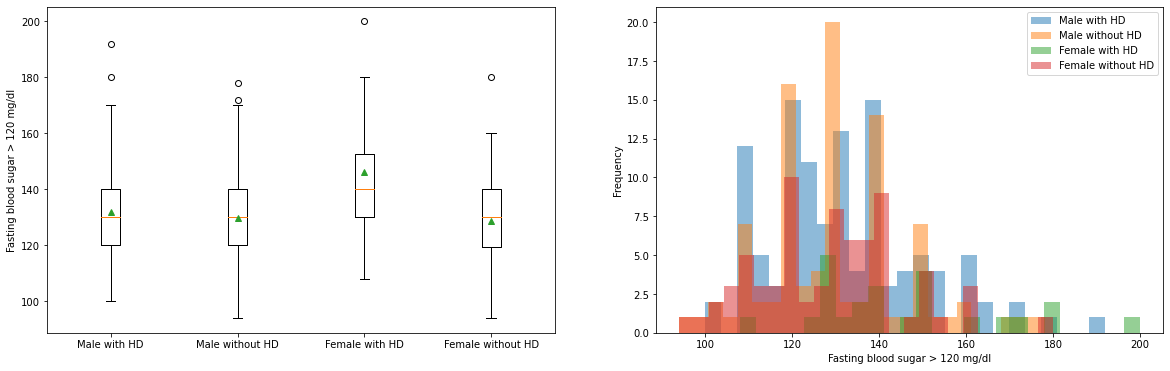

In [27]:
gend = ["Male","Female"]
hd = [True,False]

lbl_fbs = "Fasting blood sugar > 120 mg/dl"
#create a figure 
fig, (sp,sp2) = plt.subplots(1,2)

#method to access set values.
plt.rcParams["figure.figsize"] = (10,6)
#starting with chart 1
chartno = 1
#list to store created labels.
lbl = []
for gen in gend:
    for h in hd:
        lb = gen + " " + ("with HD" if h==True else "without HD")
        lbl.append(lb)
        sp.boxplot(heart[((heart.gender==gen) & (heart.hasHeartDisease == h))]["trestbps"],
                    positions=[chartno], showmeans=True)
        sp2.hist(heart[((heart.gender==gen) & (heart.hasHeartDisease == h))]["trestbps"],bins=25, alpha=0.5,lw=3)
        chartno +=1 
sp.set_ylabel(lbl_fbs)
sp2.legend(lbl)
sp.set_xticks(list(range(1,chartno)))
sp.set_xticklabels(lbl)
sp2.set_ylabel("Frequency")
sp2.set_xlabel(lbl_fbs)
plt.show()


<p>For Males with and without HD, there is not much difference between the means in Fasting blood sugar of the two populations. The means are slightly spaced, with a distance of 5 mg/dl. The fasting blood sugar of female patients seem to be quite different, with the patients with HD having a significantly higher mean and median value at 145 mg/dl and 135 mg/dl respectively. The means and medians of females without HD are much lower at 125 mg/dl and 130 mg/dl. Females with HD, overall seem to have significantly higher fasting blood sugar than females without.</p>

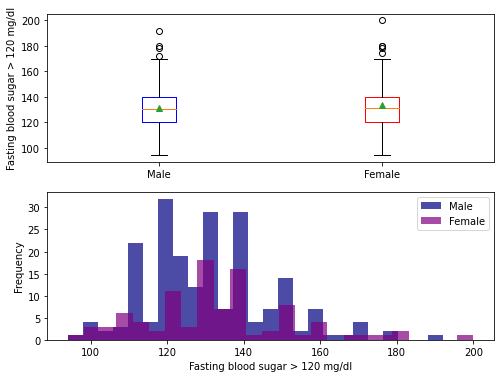

In [41]:
male_trestbps = heart[heart.gender ==gend[0]]["trestbps"]
female_trestbps = heart[heart.gender ==gend[1]]["trestbps"]

boxprops={"color":"red"}
#boxplots
fig, (sp,sp2) = plt.subplots(2,1)
plt.rcParams["figure.figsize"] = (8,6)
sp.boxplot(male_trestbps,positions=[1],showmeans=True,boxprops={"c":"blue"})
sp.boxplot(female_trestbps,positions=[2],showmeans=True,boxprops = {"c":"red"})
sp.set_xticks([1,2])
sp.set_xticklabels(gend)
sp.set_ylabel(lbl_fbs)

#histogram
sp2.hist(male_trestbps,alpha = 0.7, color ="navy", bins = 25)
sp2.hist(female_trestbps,alpha = 0.7, color="purple",bins=25)
sp2.legend(gend)
sp2.set_xlabel(lbl_fbs)
sp2.set_ylabel("Frequency")
plt.show()


<p>There does not seem to be much difference between the male and female subgroups in fasting blood sugar. The mean and median are similar and the outliers are also very similar in value. The histogram shows that there are less female than male patients, and the distribution looks very similar.</p>

<p>In statistics, Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. It is named for its creator, Bernard Lewis Welch, and is an adaptation of Student's t-test, and is more reliable when the two samples have unequal variances and/or unequal sample sizes. These tests are often referred to as "unpaired" or "independent samples" t-tests, as they are typically applied when the statistical units underlying the two samples being compared are non-overlapping. Given that Welch's t-test has been less popular than Student's t-test and may be less familiar to readers, a more informative name is "Welch's unequal variances t-test" — or "unequal variances t-test" for brevity.
<br/><br/>
Today we will be using Students t-tests as the data's statistics are overlapping. We cannot consider them independent populations, hence we will use the same variances.</p>

In [18]:
male_hd = heart[((heart.gender ==gend[0]) & (heart.hasHeartDisease == True))]["trestbps"]
male_nohd = heart[((heart.gender ==gend[0]) & (heart.hasHeartDisease == False))]["trestbps"]
ttest_result = stats.ttest_ind(male_hd, male_nohd)
ttest_result

Ttest_indResult(statistic=0.9396830483284377, pvalue=0.3484860467059646)

In [19]:
female_hd = heart[((heart.gender == gend[1]) & (heart.hasHeartDisease == True))]["trestbps"]
female_nohd = heart[((heart.gender == gend[1]) & (heart.hasHeartDisease == False))]["trestbps"]
ttest_result = stats.ttest_ind(female_hd, female_nohd)
ttest_result

Ttest_indResult(statistic=4.130691885476511, pvalue=7.837377824823497e-05)

<p>The p-values seem to agree with the points stated above about the two groups, males and females with and without HD. The males have a high p-value suggesting the null hypothesis is correct and there is no significant difference between the means of the two groups. For females, the p-value is 7.837377824823497e-05, which is smaller than the 5% significance level, stating the groups have different means.</p>

In [20]:
def cohen_d(a,b):
    """
    Calculate cohen's d which measures difference between the mean from two Gaussian-distributed variables. 
    It is a standard score that summarizes the difference in terms of the number of standard deviations. 
    Because the score is standardized, there is a table for the interpretation of the result, summarized as:
    - Small Effect Size: d=0.20
    - Medium Effect Size: d=0.50
    - Large Effect Size: d=0.80
    """
    n1 = len(a)
    n2 = len(b)
    s1 = np.std(a)
    s2 = np.std(b)
    u1 = np.mean(a)
    u2 = np.mean(b)
    s = np.sqrt(((n1 - 1)* pow(s1,2) + (n2 - 1)* pow(s2,2)) / (n1 + n2 - 2))
    d = (u1 - u2) / s
    return d

In [21]:
print("When comparing the Cohen d values for Fasting blood sugar:")
print("The cohen d value for females with and without heart disease is: " + str(cohen_d(female_hd, female_nohd ))) 
print("The cohen d value for males with and without heart disease is: " + str(cohen_d(male_hd, male_nohd )))

When comparing the Cohen d values for Fasting blood sugar:
The cohen d value for females with and without heart disease is: 0.9853496886787664
The cohen d value for males with and without heart disease is: 0.13193635999341918


<p>The Cohen's d value shows how many standard deviations the data differs from. A d of 1 indicates the two groups differ by 1 standard deviation, a d of 2 indicates they differ by 2 standard deviations, and so on. A small effect is when d = 0.2, Medium is d=0.5 and large is d=0.8 or more. In this case, there seems to be no significance between the male groups. For the female group, it is quite significant with a difference of 0.985 which shows that the difference between the two means are almost greater than 1 standard deviation. </p>

In [22]:
#Count the number with the disease for each gender type
hasDiseaseCount= heart[heart.hasHeartDisease==True].groupby("gender").count().hasHeartDisease

#Count the number of gender type
totalCount= heart.groupby("gender").count()['hasHeartDisease']

#combine into a dataframe (both are indexed with gender, so will be matched) and specify the columns
p=pd.concat([hasDiseaseCount, totalCount], axis=1)
p.columns = ["heartDiseaseCount", "totalCount"]

#create a new column and calculate the proportion
p['propHeartDisease']=p["heartDiseaseCount"]/p["totalCount"]

#print the results
print(p.head())

        heartDiseaseCount  totalCount  propHeartDisease
gender                                                 
Female                 24          96          0.250000
Male                  114         207          0.550725


<P>It seems that a lower proportion of women have the disease and slighly more than 50% of men have heart disease in the sample population.</P>

<h3>Hypothesis Testing for One Proportion</h3>
<p><b>Step 1</b> assume the percentage population with $HD = 0.42$<br/>
$H_{o}: p_{0} = 0.42$  -- <b>null hypothesis</b><br/>
$H_{a}: p > 0.42$  -- <b>alternative hypothesis</b><br/>
<br/>
<b>Step 2:</b> Assume that the dataset above is a representative sample from the population of the US.
So, calculate the population proportion of the US having heart disease.
    </p>

In [42]:
import scipy.stats.distributions as dist

p_us = len(heart[heart['hasHeartDisease']== True])/len(heart)
print("The population proportion of the sample having heart disease is " + str(np.round(p_us,3))+".")


The population proportion of the sample having heart disease is 0.455.


<p>To find out if the observed population proportion is significantly more than the null hypothesis, perform a hypothesis test.<br/>
<b>Step 3:</b> Calculate the Test Statistic:<br/><br/>
$\frac{Best Estimate - Hypothesised Estimate}{Standard Error of Estimate}$<br/>
Where the standard error is: 
$SE=\sqrt{\frac{p_{0}(1-p_{0})}{n}}$</p>

In [43]:
se = np.sqrt((0.42*(1-0.42))/len(heart))
#Best estimate
be = p_us  #hypothesized estimate
he = 0.42
test_stat = (be - he)/se
print("The test statistic is "+ str(test_stat))

The test statistic is 1.2500987621326565


<p><b>Step 4:</b> Calculate the p-value

This test statistic is also called z-score. You can find the p-value from a z_table or you can find the p-value from this formula in python.</p>

In [44]:
pvalue =  2*dist.norm.cdf(-np.abs(test_stat))
print("The p-value is "+ str(pvalue))

The p-value is 0.21126347193421557


<p>Consider the significance level alpha to be 5% or 0.05. A significance level of 5% or less means that there is a probability of 95% or greater that the results are not random.
<br/>
Here p-value is bigger than our considered significance level 0.05. So, we cannot reject the null hypothesis. That means there is no significant difference in population proportion having heart disease in the sample population and the US.</p>

<h3>Hypothesis Tests for the Difference in Two Proportions</h3>
<p>Comparative tests are conducted much more frequently than one population proportion hypothesis test. A two-sample test of proportions is performed to assess if the population proportion of some traits differs between two subgroups.

Here, we are going to test if the population proportion of females with heart disease is different from the population proportion of males with heart disease.</p><br/>
<p><b>Step 1:</b> Set up the null hypothesis, alternative hypothesis, and significance level.

Here, we want to check if there is any difference between the population proportion of males and females having heart disease. We will start with the assumption that there is no difference.</p>

<p>$H_{o}: p_{1} -p_{2} = 0$
This is our null hypothesis. Here, $p_{1}$ is the population proportion of females with heart disease and $p_{2}$ is the population proportion of males having heart disease.

What could be the alternative hypothesis?

The alternative hypothesis can be, there is a difference.

$H_{a}: p_{1} -p_{2} \neq 0$
    
Let’s use the significance level of 0.1 or 10%.
    
<b>Step 2:</b> Prepare a chart that shows the population proportion of males and females with heart disease and the total male and female population.</p>

In [45]:
p = heart.groupby("gender")['hasHeartDisease'].agg([lambda z: np.mean(z==True), "size"])
p.columns = ["HeartDisease", 'Total']
p

HeartDisease  Total
gender                     
Female      0.250000     96
Male        0.550725    207

<p><b>Step 3:</b> Calculate the test statistic

We will use the same formula for the test statistic as before. The best estimate is $p_{1} — p_{2}$. Here, $p_{1}$ is the population proportion of females with heart disease and $p_{2}$ is the population proportion of males with heart disease.</p>

In [47]:
#Best estimate is p1 - p2. Get p1 and p2 from the chart p above
p_fe = p.HeartDisease.Female
p_male = p.HeartDisease.Male
p_fe -p_male

-0.3007246376811594

<p>The standard error for two population proportion is calculated with the formula below:

$SE=\sqrt{p(1-p)(\frac{1}{n_{1}}+\frac{1}{n_{2}})}$</p>

Here, $p$ is the total population proportion in the sample with heart disease. $n_{1}$ and $n_{2}$ are the total numbers of the female and male populations in the sample.


In [48]:
n1 = p.Total.Female
n2 = p.Total.Male
se = np.sqrt(p_us*(1-p_us)*(1/n1 + 1/n2))
print("The Standard error is "+ str(se))

The Standard error is 0.06149494420532701


In [49]:
#using this to calculate  the test statistic
#calculate the best estimate
be = p_fe - p_male  
#Calculate the hypothesized estimate
#Our null hypothesis is p1 - p2 = 0
he = 0  
#Calculate the test statistic
test_statistic = (be - he)/se
print("The Test statistic is {0} This means that the observed difference in sample proportions is {0} estimated standard error below the hypothesised value".format(
    np.round(test_statistic,3)))

The Test statistic is -4.89 This means that the observed difference in sample proportions is -4.89 estimated standard error below the hypothesised value


<p><b>Step 4: Calculate the p-value</b></p>

In [50]:
pvalue = 2*dist.norm.cdf(-np.abs(test_statistic))
print("The p-value is {}".format(pvalue))

The p-value is 1.0071642033238867e-06


<p>With this p-value, since it is below the 5% significance level, we can reject the null hypothesis. This means that the difference between the proportion of males with heart disease to females is statistically significant.</p>